# Description



# Objetives



## Tarea PCA

Pasos a seguir en el ejercicio

- Estandarizamos los datos de entrada
  - ¿ Qué ocurriría si no estandarizamos los datos ?
- Aplicamos PCA
    - Visualizamos acumulado de variabilidad explicada
- Aplicamos SMOTETomek
- Gráfica 2D, en donde el eje X e Y serán los 2 primero componentes principales obtenidos por PCA.
- Evaluamos el modelo

- Conclusión






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import *
from numpy import mean
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score 
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### Cargamos los datos

In [2]:
breast_cancer = load_breast_cancer()

### Creamos un dataframe con los datos

In [3]:
df_features = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Estandarizamos los datos

In [5]:
## Realizamos una partición con datos estandarizados
ss = StandardScaler()
df_features = ss.fit_transform(df_features)

### ¿Qué ocurriría si no estandarizamos los datos?

Ocurriría que PCA estaría sesgado hacia las variables con rangos mayores. Tenemos en cuenta que PCA se basa en la varianza de las variables por lo que una variable que se salga del rango será definida con una varianza mayor y por lo tanto con mayor influencia en el componente. 

### Añadimos variable target al dataframe

In [6]:
df = pd.DataFrame(breast_cancer.target)

### Aplicamos PCA 

En la configuración de PCA debemos de tener en cuenta el número de variables del conjunto de datos original, el número de instancias y la cantidad de varianza explicada. 

Se debe de elegir un número de componentes que sea menor al valor mínimo de instancias y variables (components==min(n_samples, n_features). 

Una de la opciones es elegir como número de componentes el total de variables del conjunto de datos y posteriormente se selecciona el conjunto de estos que proporcione la cantidad de varianza explicada necesaria. Esta ultima estretegia es aconsejable cuando el conjunto de variables del conjunto de datos no es excesivamente grande. 

Otro método es visualizar la varianza explicada del total de componentes y identificar donde se produce una caída significativa en la varianza explicada, relativa a la componente anterior. Esto muestra el punto aconsejable a partir del cual elegir las componentes en función de su aportación.


En nuestro caso como el conjunto de datos tiene 30 variables configuramos PCA con 15 componentes inicialmente. A partir de estos 15 componentes visualizaremos el ratio de varianza explicada e elegiremos el número de estos que acumulen el 85% de la información.

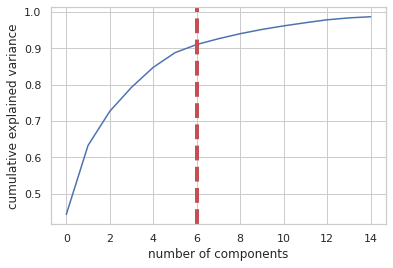

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.442720,0.442720
1,0.632432,0.189712
2,0.726364,0.093932
3,0.792385,0.066021
4,0.847343,0.054958
5,0.887588,0.040245
6,0.910095,0.022507
7,0.925983,0.015887
8,0.939879,0.013896
9,0.951569,0.011690


In [7]:
pca_all = PCA(n_components=15)
pca_transform = pca_all.fit_transform(df_features)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=6, ymin=0, ymax=1)
display(plt.show())

evr = pca_all.explained_variance_ratio_
cvr = np.cumsum(pca_all.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(15))

In [8]:
print("shape of X_pca", pca_transform.shape)
expl = pca_all.explained_variance_ratio_
print(expl)
print('suma:',sum(expl))
print(expl[0:5])
print('suma:',sum(expl[0:4]))

shape of X_pca (569, 15)
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783]
suma: 0.9864881227121612
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]
suma: 0.7923850582446098


Como vemos con tan solo 5 componentes consiguen representar el 85% del total de la varianza explicada. A su vez también denotamos como la pendiente de la curva a partir de ese mismo componente empieza a decrecer mostrando esto que el resto de componentes cada vez tienen menos varianza que ofrecer al conjunto. Denotamos que nos quedamos con 5 de los 15 componentes elegidos inicialmente de un total de 30 variables que formaban al conjunto de datos original. 

### Aplicamos PCA con 5 componentes

In [9]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df_features)
X_pca.shape

(569, 5)

### Dividimos el conjunto de datos en train y test

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X_pca, df, test_size = 0.3, stratify=df)

### Combinación Smote-Tomek

Consiste en aplicar simultáneamente los algoritmos de oversampling Smote y undersampling Tomek.

In [13]:
## SMOTETomek sobre datos estandarizados
os_us = SMOTETomek(random_state = 0)
train_X_com, train_y_com = os_us.fit_resample(train_X, train_y)

## Aplicamos SMOTETomek en conjunto de entrenamiento estandarizado
train_X_com_st, train_y_com_st = os_us.fit_resample(train_X, train_y)


print('Before', train_y.value_counts())
print('After', train_y_com.value_counts())

Before 1    250
0    148
dtype: int64
After 0    249
1    249
dtype: int64


### Gráfica 2D, en donde el eje X e Y serán los 2 primero componentes principales obtenidos por PCA.

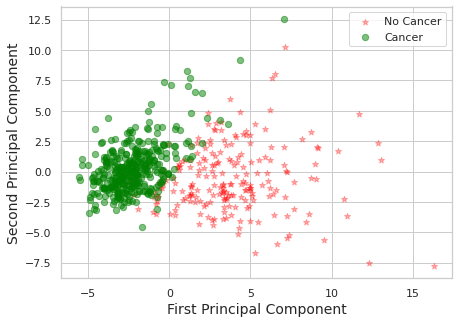

In [24]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
df['target'] = df
labels=df['target'].values
cdict={0:'red',1:'green'}
labl={0:'No Cancer',1:'Cancer'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

Vemos como las dos primeras componentes (lás más significativas, alcanzan el 72% de la varianza explicada) consiguen clasificar las distintas instancias de una forma bastante precisa.

### Selección del modelo

Nuestro modelo sera KNN. KNN es un algoritmo supervisado de clasificación.

Podemos configurar hiperparámetros modificacando características tales como el número de vecinos, la forma de dar peso a las distancias o la métrica de distancias utilizada entre otros.

En nuestro caso crearemos un modelo con número de vecinos = 3 y distancia manhattan. La función de pesos la mantenemos como uniforme.

In [14]:
knn_com_st = KNeighborsClassifier(n_neighbors=3,  metric='manhattan')

### Entrenemos al modelo con los conjuntos de datos creados

In [15]:
## Conjunto de datos con SMOTETomek y estandarización
knn_com_st.fit(train_X_com_st,train_y_com_st)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

### Evaluación del modelo

In [17]:
## Acurracy, F Score, Precision y ROC score de KNN Combi-sampling Standarized
prediction=knn_com_st.predict(test_X)
print('KNN Com Std Model Accuracy :',accuracy_score(prediction,test_y))
print()
print('KNN Com Std Model F Scores Micro:',f1_score(prediction,test_y, average='micro'))
print('KNN Com Std Model F Scores Macro:',f1_score(prediction,test_y, average='macro'))
print('KNN Com Std Model F Scores Weighted:',f1_score(prediction,test_y, average='weighted'))
print()
print('KNN Com Std Model Precision Score Micro:',precision_score(prediction,test_y, average='micro'))
print('KNN Com Std Model Precision Score Macro:',precision_score(prediction,test_y, average='macro'))
print('KNN Com Std Model Precision Score Weighted:',precision_score(prediction,test_y, average='weighted'))
print()
print('KNN Com Std Model ROC AUC Score :', roc_auc_score(test_y, knn_com_st.predict_proba(test_X)[:, 1]))
print()
print('KNN Over Std Model Confusion Matrix: \n', confusion_matrix(test_y, prediction))
print()
print('KNN Over Std Model Classification Report: \n', classification_report(test_y, prediction))

KNN Com Std Model Accuracy : 0.9707602339181286

KNN Com Std Model F Scores Micro: 0.9707602339181286
KNN Com Std Model F Scores Macro: 0.9688830658368817
KNN Com Std Model F Scores Weighted: 0.9707155394400037

KNN Com Std Model Precision Score Micro: 0.9707602339181286
KNN Com Std Model Precision Score Macro: 0.970356308411215
KNN Com Std Model Precision Score Weighted: 0.970741446685249

KNN Com Std Model ROC AUC Score : 0.9965683411214954

KNN Over Std Model Confusion Matrix: 
 [[ 62   2]
 [  3 104]]

KNN Over Std Model Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.98      0.97      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [20]:
### Cross Validation AUC
knn_com_st_fs_cv = cross_val_score(knn_com_st,train_X, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC KNN_com_st_fs:', mean(knn_com_st_fs_cv))

AUC KNN_com_st_fs: 0.9730571428571428


### Conclusión:

A modo de conclusión y tras la vista de los resultados obtenidos podemos decir que PCA ha conseguido no solo simplificar el conjunto de datos y reducir computacionalmente el costo de la ejecución del modelo si no también unas métricas bastante óptimas. 

 A su vez también denotamos la importancia que tiene el preprocesamiento de los datos tales como las estandarización con el fin de evitar bias en el desarrollo de los componentes.  Otros de los factores que se deben de tener en cuenta son los valores nulos y outliers (efecto similar a la no estandarización de los datos). 
